In [1]:
import pandas as pd
from predict import predict
import matplotlib.pyplot as plt

Below, we will load the test dataset and show the first 5 rows: 

In [2]:
test = pd.read_csv('student_data.csv', index_col='Student ID')
test.head()

,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
Student ID,,,,,,,,
0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


In [3]:
y_col = ['Good Candidate'] 
X_cols = list(test.columns)
X_cols.remove('Good Candidate')

y = test[y_col] 
X = test[X_cols]

Below we will visualize the categorical variables: 

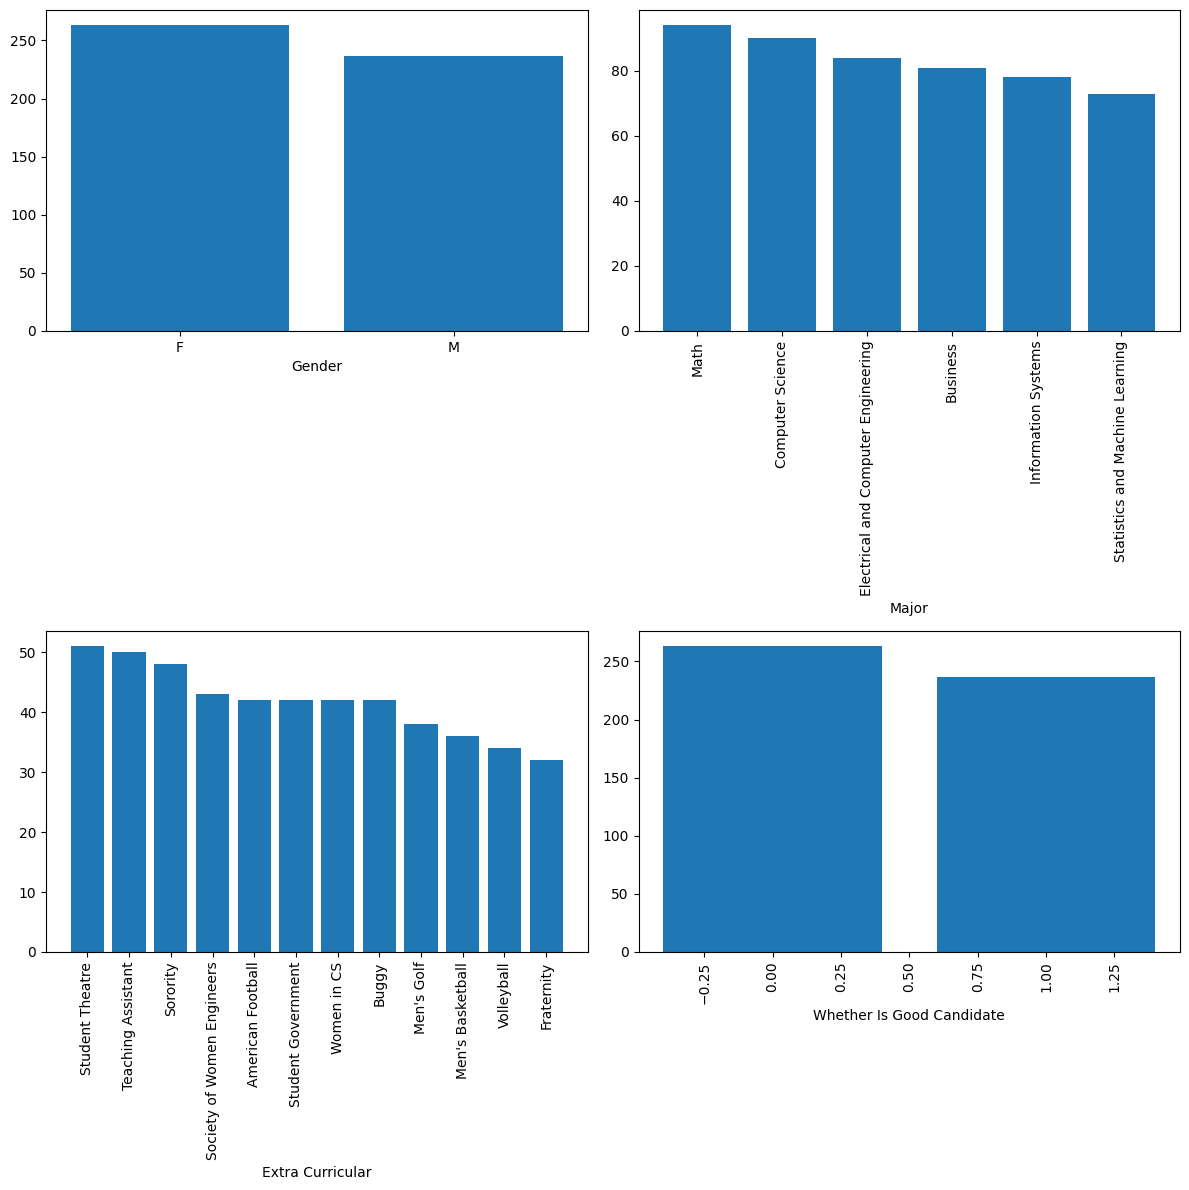

In [4]:
plt.rcParams["figure.figsize"] = [12, 12]
plt.rcParams["figure.autolayout"] = True

counts = dict(X['Gender'].value_counts())
plt.subplot(221)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Gender')

counts = dict(X['Major'].value_counts())
plt.subplot(222)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Major')
plt.xticks(rotation = 90)

counts = dict(X['Extra Curricular'].value_counts())
plt.subplot(223)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Extra Curricular')
plt.xticks(rotation = 90)

counts = dict(y["Good Candidate"].value_counts())
plt.subplot(224)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Whether Is Good Candidate')
plt.xticks(rotation = 90)

plt.show()

Below we will visualize the numeric variables: 

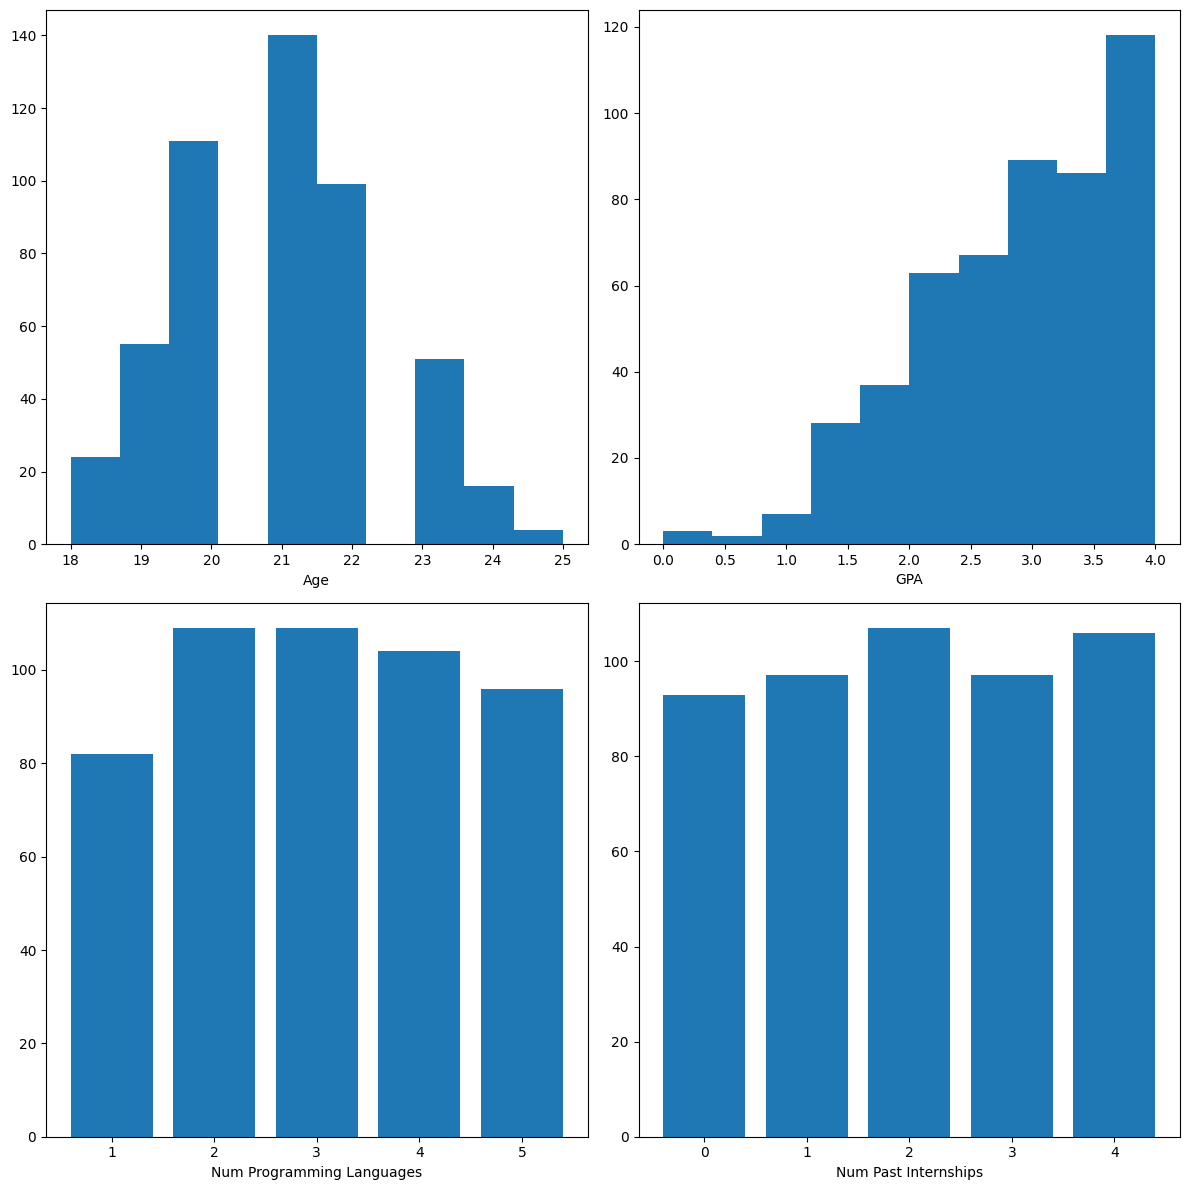

In [5]:
plt.subplot(221)
plt.hist(X['Age'])
plt.xlabel('Age')

plt.subplot(222)
plt.hist(X['GPA'])
plt.xlabel('GPA')

counts = dict(X['Num Programming Languages'].value_counts())
plt.subplot(223)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Num Programming Languages')

counts = dict(X['Num Past Internships'].value_counts())
plt.subplot(224)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Num Past Internships')


plt.show() 

Next, we will make predictions from the test dataset and evaluate the model using some metrics. 

In [ ]:
from predict import predict 
from tqdm import tqdm

# test["student_id"] = "student" + test.index

def to_dict(data_entry): 
    tmp_dict = dict(data_entry) 
    tmp_dict['student_id'] = "na" 
    return tmp_dict

test_inputs = test.apply(to_dict, axis=1)
test_inputs = list(test_inputs)

test_outputs = [ predict(input) for input in tqdm(test_inputs) ]
test_outputs = [ output['good_employee'] for output in test_outputs ] 
# test_outputs

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print("Below is confusion matrix: \n", 
      confusion_matrix(test["Good Candidate"], test_outputs))

print(classification_report(test["Good Candidate"], test_outputs))

Below is confusion matrix: 
 [[221  42]
 [ 42 195]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       263
           1       0.82      0.82      0.82       237

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Accurary and F1-score are both $0.83$. And please see the confusion matrix above. 